In [67]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

We use the plummer potential given by (imposing b=1):

$ \Phi=-\frac{GM_{tot}}{(r^2 +a^2)^{1/2}}$

In [68]:
N=int(1e4)
a = 10
M_tot = 1
G = 1


potential = lambda m, r, a: - m / ((r**2 + a**2) ** 0.5)
density = lambda m, a, r : ((3 * m) / (4 * np.pi * a**3) ) * (1 + (r/a) ** 2) ** (-2.5)
dispersion = lambda m, a, r:  m / 6 * ((1 + (r/a)**2) ** 0.5)

In [69]:
# Definition Perturber 

M = M_tot/100
R_in = a/2 
v_circ = np.sqrt(M_tot/R_in)

The density goes as

$\rho (r) =\frac{3 M_{tot}}{4\pi a^3}{\big(1+\big({\frac{r}{a}}\big)^2\big)}^{-\frac{5}{2}}$

with a scale parameter.

We find the mass inside a radius r and invert the formula to find r as a function of the radius $\chi=\frac{M}{M_{tot}}$ finding:

$r=\bigg( \frac{\chi^{\frac{2}{3}}}{\big(1-\chi^{\frac{2}{3}}\big)}\bigg)^{\frac{1}{2}}$

In [70]:
#sampling r
chi = np.random.uniform(0, 1, N)
r = a * (chi ** (2/3) / (1 - chi ** (2/3))) ** 0.5 

rho = density(M_tot, a, r)
ff = ((3 * np.pi) / (32 * rho * G)) ** 0.5
tdyn = 1/np.sqrt(G*rho)

print('Free Fall time:', np.mean(ff))
print('Dynamical time:', tdyn[-1])

Free Fall time: 4876.968929780892
Dynamical time: 306.3460046314678


In [71]:
max_r = np.max(r)
print('Maximum radius:', max_r)

Maximum radius: 1777.8446704285602


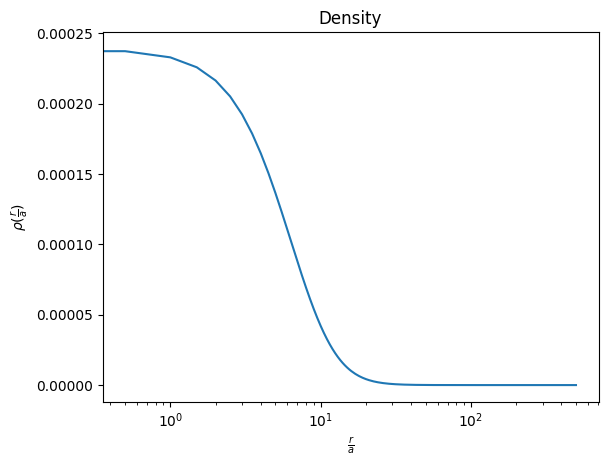

In [72]:
rgrid = np.linspace(0, 500, 1000)
plotted = density(M_tot, a, rgrid)

plt.plot(rgrid, plotted)
plt.xlabel(r'$\frac{r}{a}$')
plt.ylabel(r'$\rho(\frac{r}{a})$')
plt.title('Density')
plt.semilogx();

In [73]:
#sampling theta and phi
#np.random.seed(19)
phi = np.random.uniform(0,2 * np.pi, N)
arc_theta = np.random.uniform(0, 1, N)
theta=np.asarray([math.acos(1 - 2 * arc_theta[i]) for i in range(N)])

(10000,)
(10000,)
(10000,)


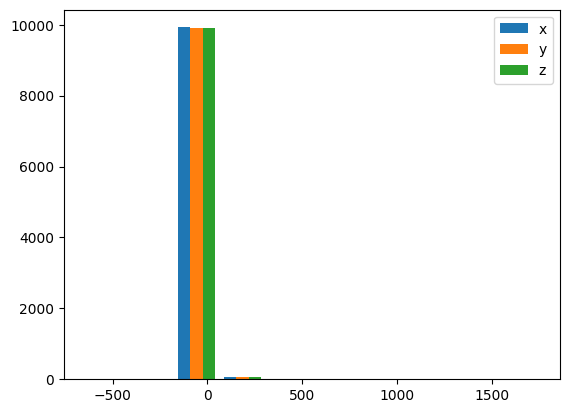

In [74]:
#change of coordinates
x = r * np.sin(theta) * np.cos(phi)
print(x.shape)
y = r * np.sin(theta) * np.sin(phi)
print(y.shape)
z = r * np.cos(theta)
print(z.shape)
plt.hist([x, y, z], label=['x', 'y', 'z'])
plt.legend();

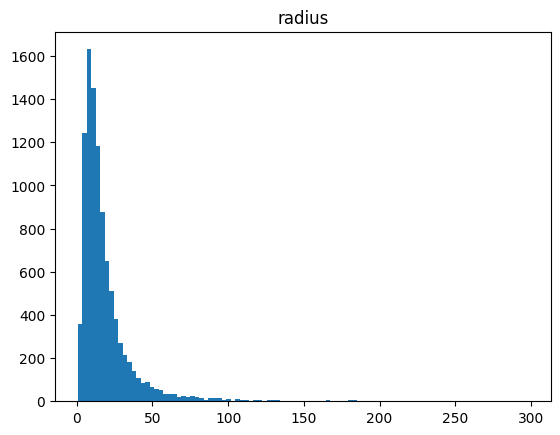

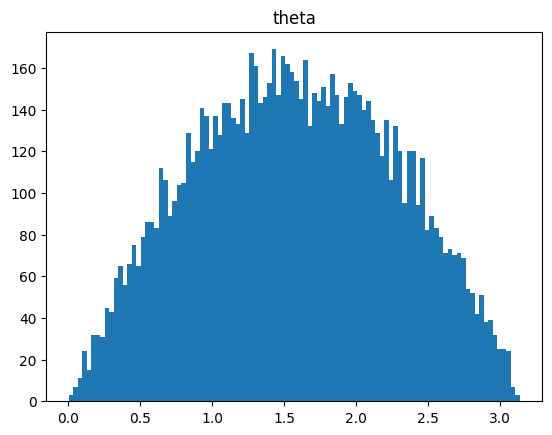

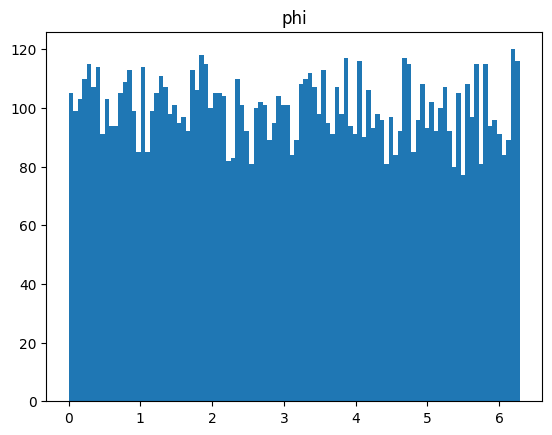

In [75]:
plt.hist(r[r<300], bins=100);
plt.title('radius')
plt.show()
plt.hist(theta, bins=100);
plt.title('theta')
plt.show()
plt.hist(phi, bins=100);
plt.title('phi')
plt.show()

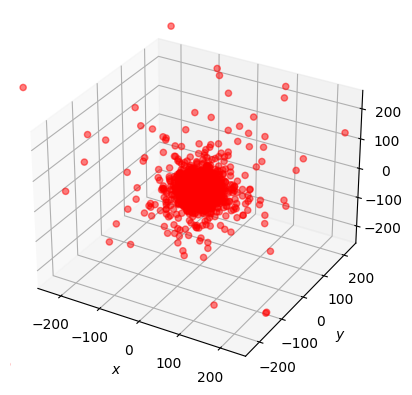

In [76]:
#plotting the generated particles

l = 250

fig = plt.figure('Positions')
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, color='red',alpha=0.5)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

ax.set_xlim(-l, l)
ax.set_ylim(-l, l)
ax.set_zlim(-l, l)


plt.show()

We sample valocities using the ratio between the velocity of the particles and the escape velocity given by:

$q=\frac{v}{\sqrt{(2\Psi)}}$

In [77]:
#definition of the probability for q
def f(q):
    return ((1-q**2)**3.5)*q**2 

In [78]:
#rejection sampling for q
points=[]
while(len(points)<N):
    q = np.random.uniform(0,1,1)
    y_prop = np.random.uniform(0, np.max(f(np.linspace(0, 1, 1000))),1)
    if y_prop<f(q):
        points.append(q)

In [79]:
q=np.array(points)

In [80]:
q[:, 0].shape

(10000,)

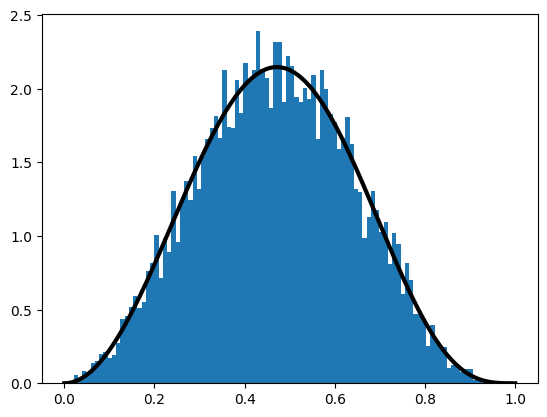

In [81]:
#plotting the distribution of q
plt.hist(q, bins=100, density=True)
xgrid = np.linspace(0, 1, 1000)

plt.plot(xgrid, (512/(7*np.pi))*f(xgrid), c='k', lw=3);

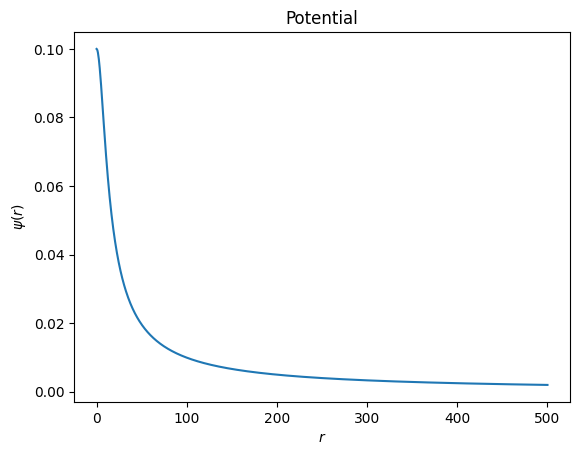

In [82]:
plt.plot(rgrid, -potential(M_tot, rgrid, a))
plt.xlabel(r'$r$')
plt.ylabel(r'$\psi(r)$')
plt.title('Potential');

In [83]:
#creating velocities with random direction 
psi = -potential(M_tot, r, a)

phi = np.random.uniform(0, 2*np.pi, N)
arc_theta = np.random.uniform(0, 1, N)
theta = np.asarray([math.acos(1-2*arc_theta[i]) for i in range(N)])


vx = q[:, 0] * (2 * psi) ** 0.5 * np.sin(theta) * np.cos(phi)
vy = q[:, 0] * (2 * psi) ** 0.5 * np.sin(theta) * np.sin(phi)
vz = q[:, 0] * (2 * psi) ** 0.5 * np.cos(theta)

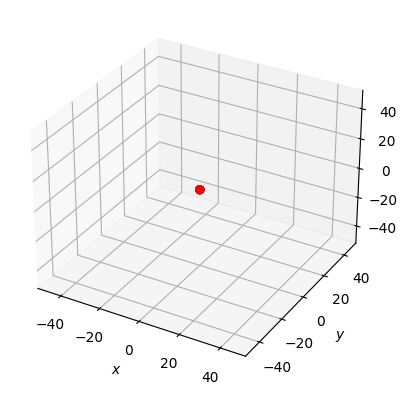

In [84]:
#plotting the generated velocities

l = 50

fig = plt.figure('Velocities')
ax = plt.axes(projection='3d')
ax.scatter3D(vx, vy, vz, color='red',alpha=0.5)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

ax.set_xlim(-l, l)
ax.set_ylim(-l, l)
ax.set_zlim(-l, l)

plt.show()

In [85]:
vx.shape

(10000,)

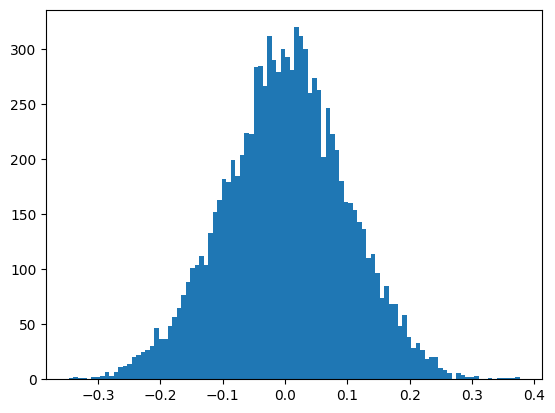

In [86]:
plt.hist(vx,bins=100);

In [99]:
# creating the input file
m = np.zeros(N)
dim = 3
mass = M_tot/N

for k in range(N):
    m[k] = mass
    
# Aggiunta perturber
m = np.append(m, M)
x = np.append(x, R_in)
y = np.append(y, 0)
z = np.append(z, 0)
vx = np.append(vx, 0)
vy = np.append(vy, v_circ)
vz = np.append(vz, 0)

rho = density(M_tot, a, r)
ff = ((3 * np.pi) / (32 * rho * G)) ** 0.5
tdyn = 1/np.sqrt(G*rho)

print('Free Fall time:', np.mean(ff))
print('Dynamical time:', tdyn[-1])

Free Fall time: 4876.968929780892
Dynamical time: 306.3460046314678


In [88]:
with open ('in_data.txt', 'w+') as f:
    f.write(str(N+1) + '\n')
    f.write(f'{dim}' + '\n')
    f.write('0' + '\n')
    for m_i in m:
        f.write(f'{m_i}' + '\n')
    for i in range(N+1):
        f.write(f'{x[i]} {y[i]} {z[i]}' + '\n')
    for j in range(N+1):
        f.write(f'{vx[j]} {vy[j]} {vz[j]}' + '\n')

## Running

In [101]:
tstop = 306.3460046314678
dtime = tstop/1000
eps = 0.1
theta = 0.2
dtout = 0.1
tstop = 306.3460046314678
os.system('./treecode in=in_data.txt out=output.txt dtime={} eps={} theta={} dtout={} tstop={}'.format(dtime, eps, theta, dtout, tstop));


Hierarchical N-body code (theta scan)

   nbody     dtime       eps     theta   usequad     dtout     tstop
   10001   0.30635    0.1000      0.20     false   0.10000  306.3460

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      16   3.022   10429  33577989  15357808   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       0.000 0.01452 0.01567 0.03019 0.51906 0.00334 0.02630   0.007

	data output to file output.txt at time 0.000000

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      16   3.021   10433  33613057  15312175   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
       0.306 0.01452 0.01567 0.03019 0.51905 0.00334 0.02630   0.014

	data output to file output.txt at time 0.306346

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      17   3.021   10425  33662846  15255450   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      63.414 0.01452 0.01508 0.02960 0.50943 0.00334 0.02630   1.307

	data output to file output.txt at time 63.413757

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      15   3.050   10517  33977698  15122755   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      63.720 0.01452 0.01508 0.02960 0.50940 0.00334 0.02630   1.313

	data output to file output.txt at time 63.720104

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      16   3.045   10514  33964996  15147051   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
      64.026 0.01452 0.01507 0.02959 0.50937 0.00334 0.02630   1.319

	data output to file output.txt at time 64.026451

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      17   3.070   10539  34100398  15080778   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |

	  4096.0      15   3.060   10554  34079333  15108184   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
     127.133 0.01452 0.01493 0.02945 0.50704 0.00334 0.02630   2.623

	data output to file output.txt at time 127.133125

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      16   3.066   10585  34248599  15036418   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
     127.439 0.01452 0.01493 0.02945 0.50704 0.00334 0.02630   2.629

	data output to file output.txt at time 127.439468

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      15   3.065   10571  34180434  15051445   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
     127.746 0.01452 0.01493 0.02945 0.50705 0.00334 0.02630   2.636

	data output to file output.txt at time 127.745811

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      15   3.077   10604  34169342  1506928

     190.548 0.01452 0.01503 0.02955 0.50858 0.00334 0.02630   3.929

	data output to file output.txt at time 190.547699

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      16   3.037   10554  34175378  15080738   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
     190.854 0.01452 0.01503 0.02955 0.50858 0.00334 0.02630   3.936

	data output to file output.txt at time 190.854050

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      16   3.046   10583  34224551  15074863   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
     191.160 0.01452 0.01503 0.02955 0.50859 0.00334 0.02630   3.942

	data output to file output.txt at time 191.160400

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      16   3.039   10559  34158533  15115757   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
     191.467 0.01452 0.01503 0.02955 0.50858 0.00334

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      15   3.068   10624  34282675  15069640   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
     254.269 0.01452 0.01485 0.02937 0.50557 0.00334 0.02630   5.243

	data output to file output.txt at time 254.268646

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      15   3.049   10603  34171851  15144185   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
     254.575 0.01452 0.01485 0.02936 0.50555 0.00334 0.02630   5.249

	data output to file output.txt at time 254.574997

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      16   3.046   10623  34209693  15118361   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
     254.881 0.01452 0.01484 0.02936 0.50553 0.00334 0.02630   5.255

	data output to file output.txt at time 254.881348

	   rsize  tdepth   ftree  actmax    nbbtot    nbcto

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
     285.209 0.01452 0.01469 0.02921 0.50290 0.00334 0.02631   5.880

	data output to file output.txt at time 285.208618

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      16   3.050   10630  34177958  15187835   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
     285.515 0.01452 0.01469 0.02921 0.50286 0.00334 0.02631   5.887

	data output to file output.txt at time 285.514954

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      15   3.065   10640  34231953  15162623   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot
     285.821 0.01452 0.01468 0.02920 0.50282 0.00334 0.02631   5.893

	data output to file output.txt at time 285.821289

	   rsize  tdepth   ftree  actmax    nbbtot    nbctot   CPUfc
	  4096.0      16   3.049   10629  34081395  15271395   0.006

        time   |T+U|       T      -U    -T/U  |Vcom|

## Fetching

In [102]:
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm
import pandas as pd

#config plot
#if "setup_text_plots" not in globals():
#    from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=12, usetex=True)
#%config InlineBackend.figure_format='retina'

In [103]:
#reading the output file
file = 'output.txt'
lines = pd.read_csv(file, names = list(range(3)), sep = '\s+') # Insert Output filename here
N = int(lines.iloc[0, 0].copy())
s = N*3+3

t = np.array([lines.iloc[2::s,0].copy().dropna()]).flatten()

m = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(3, N+3)])
x = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(N+3, 2*N+3)])
y = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(N+3, 2*N+3)])
z = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(N+3, 2*N+3)])
vx = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(2*N+3, 3*N+3)])
vy = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(2*N+3, 3*N+3)])
vz = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(2*N+3, 3*N+3)])

In [104]:
# function for the animation
from matplotlib import animation

def update(num):
    N = len(m)   #N_particles
    l = 350
    ax.clear()
    
    ax.scatter(x[:,num-1], y[:,num-1], z[:,num-1], color = 'royalblue', s = 2.5 ,alpha = .3)        # Updating Point Location

    ax.set_title(f'{N} particles, mass = {m[0,0]}, time = {round(t[num],1)}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)

  0%|          | 0/1606 [00:00<?, ?it/s]

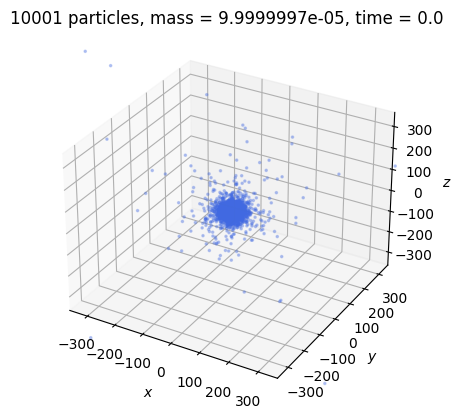

In [106]:
## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='auto')
line_ani = animation.FuncAnimation(fig, update, interval=1,   
                                   frames=tqdm(range(len(t))))

# Saving the Animation
f = fr"plummer_sphere.gif"
writergif = animation.PillowWriter(fps=30)
line_ani.save(f, writer=writergif, dpi=300)